# Básico Pandas

Pandas é uma biblioteca desenvolvida em cima do numpy para trabalhar com dados "nomeados", como por exemplo tabelas em csv e xls,  que possuem cabeçalho descritivo.

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

## 1. Tipo de dados
Dataframe é um tipo básico do pandas, em geral se comporta como uma tabela, ou seja dados com duas dimenões. Abaixo segue um exemplo de como criar um dataframe com apenas uma dimensão (fonte: geeksforgeeks).

In [4]:
lst = ['Geeks', 'For', 'Geeks', 'is', 'portal', 'for', 'Geeks']

In [5]:
df = pd.DataFrame(lst)

In [6]:
print(df)

        0
0   Geeks
1     For
2   Geeks
3      is
4  portal
5     for
6   Geeks


Exemplo de um conjunto de criação de um dataframe com dados nomeados (fonte: geeksforgeeks)

In [7]:
# intialise data of lists.
data = {'Name':['Tom', 'nick', 'krish', 'jack'],
        'Age':[20, 21, 19, 18]}

In [8]:
df = pd.DataFrame(data)

In [9]:
print(df)

    Name  Age
0    Tom   20
1   nick   21
2  krish   19
3   jack   18


## 2. Carregando dados do csv

Carga de dados da base do desafio do titanic [keggle](https://www.kaggle.com/c/titanic/data) em csv.

In [10]:
df = pd.read_csv('../data/titanic/train.csv')

A função describe apresenta um descrição geral da nosso csv com resumos estatísticos, como min, max, média, desvio padrão, etc.

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Os dados de cada coluna podem ser acessados utilizando a referência do nome da coluna.

In [12]:
survived = df['Survived']
survived.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

## 3. Exibindo dados através de gráficos

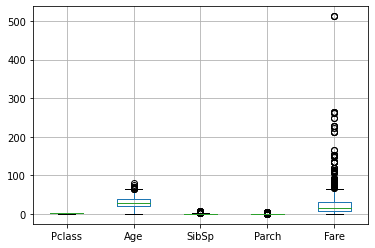

In [13]:
plt.figure()
bp = df.drop(['PassengerId', 'Survived'], axis=1).boxplot()

/home/cindy/Projects/python-data-science/env/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Parch', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Fare', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age'>,
        <AxesSubplot:xlabel='Parch', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>],
       [<AxesSubplot:xlabel='Pclass', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Age', ylabel='SibSp'>,
        <AxesSubplot:xlabel='SibSp', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Parch', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Fare', ylabel='SibSp'>],
       [<AxesSubplot:xlabel='Pclass', ylabel='Parch'>,
        <AxesSubplot:xlabel='Age', ylabel='Parch'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Parch'>,
        <AxesSubplot:xlabel='Parch', 

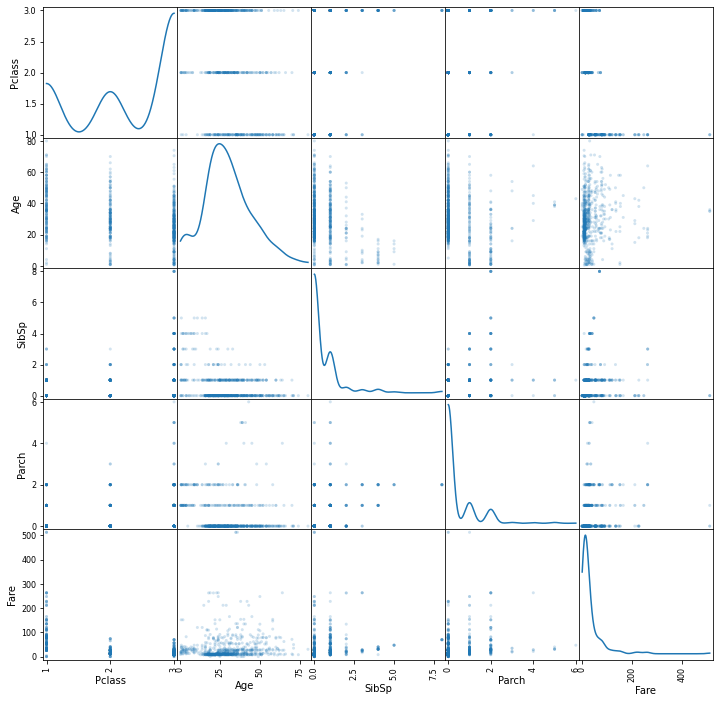

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(
    df.drop(['PassengerId', 'Survived'], axis=1),
    alpha=0.2,
    figsize=(12, 12),
    diagonal='kde'
)

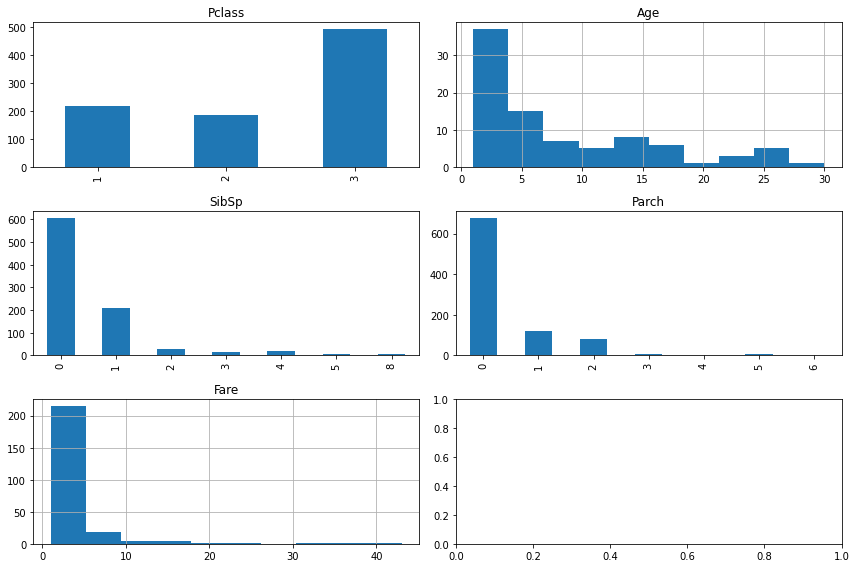

In [33]:
fig, axs = plt.subplots(3, 2, figsize=(12, 8))
df['Pclass'].value_counts().sort_index().plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_title("Pclass")
df['Age'].value_counts().hist(ax=axs[0, 1])
axs[0, 1].set_title("Age")
df['SibSp'].value_counts().sort_index().plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title("SibSp")
df['Parch'].value_counts().sort_index().plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title("Parch")
df['Fare'].value_counts().hist(ax=axs[2, 0])
axs[2, 0].set_title("Fare")
fig.tight_layout()